# Plotting Sigmoid Function

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

In [27]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [28]:
sigmoid(1,0.5,0)

0.6224593312018546

In [29]:
w = 0.9 
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

In [30]:
type(Y)

numpy.ndarray

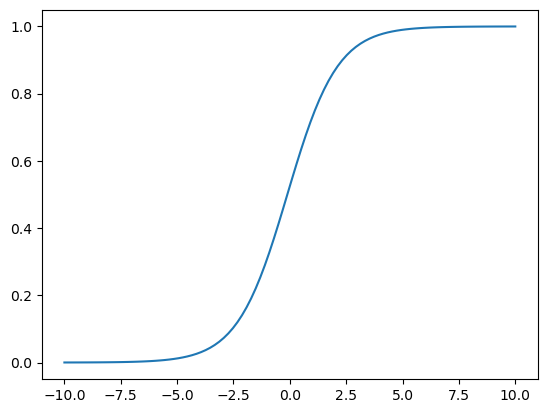

In [31]:
plt.plot(X,Y)
plt.show()

In [32]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [33]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [34]:
from mpl_toolkits import mplot3d

In [35]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2) #forming every possible combination of x and y

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [36]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

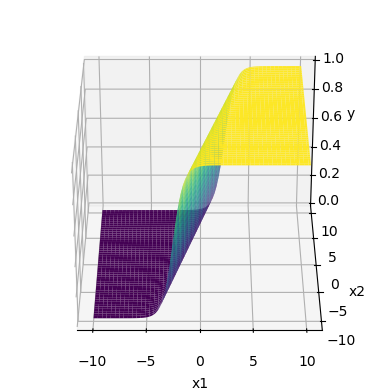

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 270) # to roatate the graph

# Compute Loss

In [38]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25)*20-10
Y = sigmoid(X,w_unknown,b_unknown)

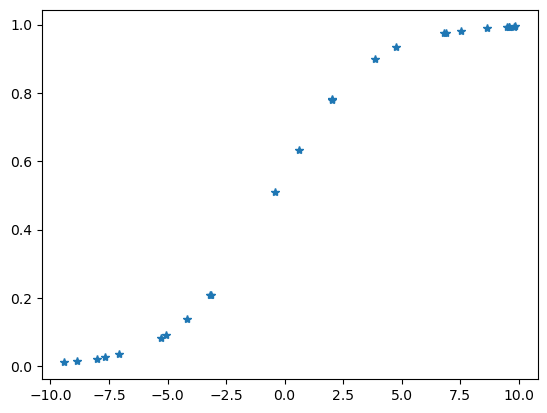

In [39]:
plt.plot(X,Y,"*")
plt.show()

In [40]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW,BB = np.meshgrid(W,B)
loss = np.zeros(WW.shape)

In [41]:
WW.shape

(101, 101)

In [42]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [43]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

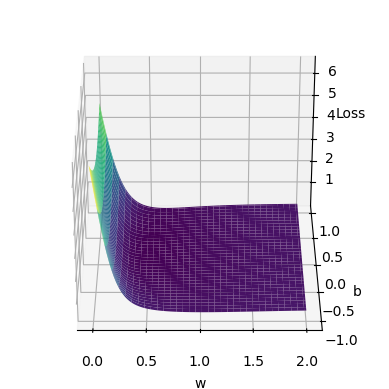

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [45]:
ij = np.argmin(loss)
i = int(np.floor(ij/loss.shape[1]))
j = int(ij - i * loss.shape[1])

In [46]:
print(i, j)

63 25


In [47]:
print(WW[i, j], BB[i, j])

0.5 0.26


# Sigmoid Neuron Class

In [48]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

# Fit the model for a dataset

In [49]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [50]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [51]:
sn.fit(X, Y, 1, 0.5, True)
for i in range(20):
    print(sn.w,sn.b)
    sn.fit(X, Y, 1, 0.5, False)

[[1.00222702 0.50345531]] [0.03566512]
[[1.07427437 0.14551371]] [0.0916698]
[[ 1.07613226 -0.25739823]] [0.08106519]
[[ 1.08695532 -0.45410885]] [0.00695833]
[[ 1.19783468 -0.3353604 ]] [-0.0513633]
[[ 1.21746781 -0.45631788]] [-0.10993815]
[[ 1.2916422  -0.40168949]] [-0.15741919]
[[ 1.32182785 -0.45787493]] [-0.20313359]
[[ 1.37046573 -0.44893996]] [-0.24261811]
[[ 1.40487289 -0.47063356]] [-0.27957465]
[[ 1.44123051 -0.4782402 ]] [-0.31308493]
[[ 1.47361919 -0.48975588]] [-0.34414487]
[[ 1.50441649 -0.49928993]] [-0.37287512]
[[ 1.53328134 -0.50854322]] [-0.39960395]
[[ 1.56053326 -0.51722653]] [-0.42454814]
[[ 1.5863191  -0.52545009]] [-0.44790514]
[[ 1.61078465 -0.53325302]] [-0.46984197]
[[ 1.63405377 -0.54067521]] [-0.49050264]
[[ 1.65623432 -0.547751  ]] [-0.51001175]
[[ 1.67742057 -0.5545104 ]] [-0.52847766]


In [52]:
# for the contourplot
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y,cmap=my_cmap)
  ax.plot()

[[-1.76175508  0.09187802]] [0.00065633]
[[-1.67306684 -0.07755833]] [0.01187981]
[[-1.56171021 -0.30842946]] [0.06244448]
[[-1.44554828 -0.56525068]] [0.12523214]
[[-1.35839466 -0.67675214]] [0.14668637]
[[-1.26655879 -0.73965987]] [0.15132507]
[[-1.15312939 -0.78926106]] [0.14768024]
[[-0.99828179 -0.83920864]] [0.13737957]
[[-0.76132658 -0.90380578]] [0.12103403]
[[-0.35161811 -1.00630781]] [0.10684318]
[[ 0.1565821  -1.09430737]] [0.13063973]
[[ 0.33288931 -0.98607741]]

/var/folders/8y/_7ktt_8s6jq9l112s93q5zxh0000gn/T/ipykernel_7235/3440258141.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  YY[i, j] = sn.sigmoid(sn.perceptron(val))


 [0.16147681]
[[ 0.54419545 -0.78370418]] [0.20582563]
[[ 0.81360803 -0.45775785]] [0.2357536]
[[ 1.00252241 -0.21653331]] [0.16630259]
[[ 1.01346175 -0.44485296]] [0.08406439]
[[ 1.14138747 -0.30208397]] [0.01890216]
[[ 1.15777876 -0.45463605]] [-0.04764884]
[[ 1.24800256 -0.37229837]] [-0.10085414]
[[ 1.27400497 -0.45582428]] [-0.15286589]
[[ 1.33320359 -0.42888646]] [-0.19647084]
[[ 1.36670028 -0.46333235]] [-0.23770167]
[[ 1.40786688 -0.46576951]] [-0.27437025]
[[ 1.44173254 -0.48051116]] [-0.30841862]
[[ 1.47488423 -0.48986954]] [-0.33966957]
[[ 1.50550185 -0.49991471]] [-0.36865507]
[[ 1.53439724 -0.50907157]] [-0.3955932]
[[ 1.5616403 -0.5177619]] [-0.42072964]
[[ 1.5874196  -0.52597949]] [-0.44426038]
[[ 1.61187667 -0.53377697]] [-0.46635532]


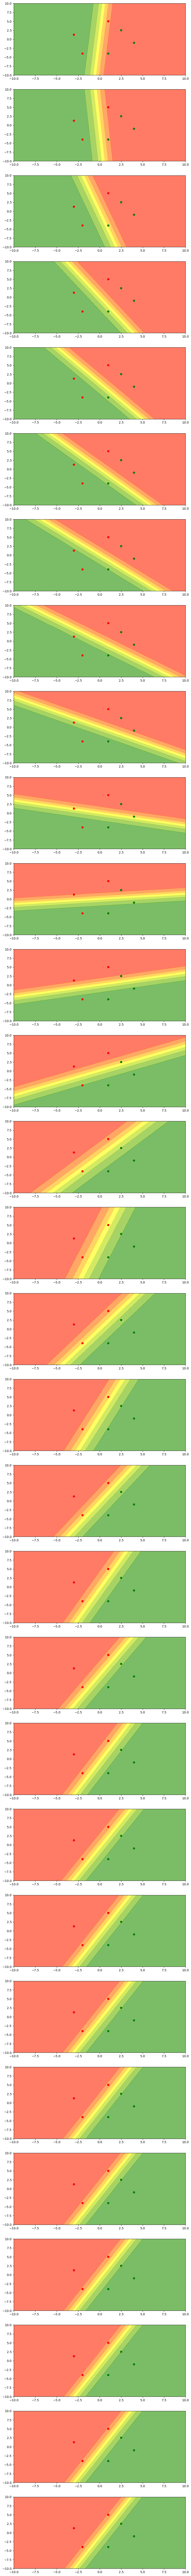

In [53]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)